In [5]:
# Let's reimport the necessary libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


uploaded = files.upload()

# Load the data
df = pd.read_csv('ipl.csv')

# Check the first few rows of the dataframe
df.head()

ModuleNotFoundError: No module named 'pandas'

In [6]:
# Data Preprocessing
# We'll keep all rows as every ball bowled is important for player performance analysis

# Total runs scored by each batsman
total_runs = df.groupby('batsman')['runs'].sum()

# Total wickets taken by each bowler
total_wickets = df.groupby('bowler')['wickets'].sum()

# Total balls faced by each batsman
# Assuming that a batsman faces one ball per row
total_balls_faced = df['batsman'].value_counts()

# Total overs bowled by each bowler
# Assuming that a bowler bowls one ball per row
total_balls_bowled = df['bowler'].value_counts()
total_overs_bowled = total_balls_bowled / 6

# Construct a DataFrame with these metrics
player_performance = pd.DataFrame({
    'Total Runs': total_runs,
    'Total Wickets': total_wickets,
    'Total Balls Faced': total_balls_faced,
    'Total Overs Bowled': total_overs_bowled
})

# Compute derived metrics
player_performance['Strike Rate'] = player_performance['Total Runs'] / player_performance['Total Balls Faced'] * 100
player_performance['Bowling Average'] = player_performance['Total Wickets'] / player_performance['Total Overs Bowled']

# Display the DataFrame
player_performance


,Total Runs,Total Wickets,Total Balls Faced,Total Overs Bowled,Strike Rate,Bowling Average
A Ashish Reddy,12905.0,265.0,115.0,16.333333,11221.739130,16.224490
A Chandila,800.0,159.0,7.0,20.000000,11428.571429,7.950000
A Chopra,1982.0,NaN,72.0,NaN,2752.777778,NaN
A Choudhary,1458.0,127.0,12.0,8.666667,12150.000000,14.653846
A Flintoff,2234.0,164.0,14.0,8.000000,15957.142857,20.500000
...,...,...,...,...,...,...
YS Chahal,433.0,1564.0,3.0,96.833333,14433.333333,16.151463
YV Takawale,2712.0,NaN,61.0,NaN,4445.901639,NaN
Yashpal Singh,517.0,NaN,21.0,NaN,2461.904762,NaN
Yuvraj Singh,95424.0,1301.0,980.0,72.500000,9737.142857,17.944828


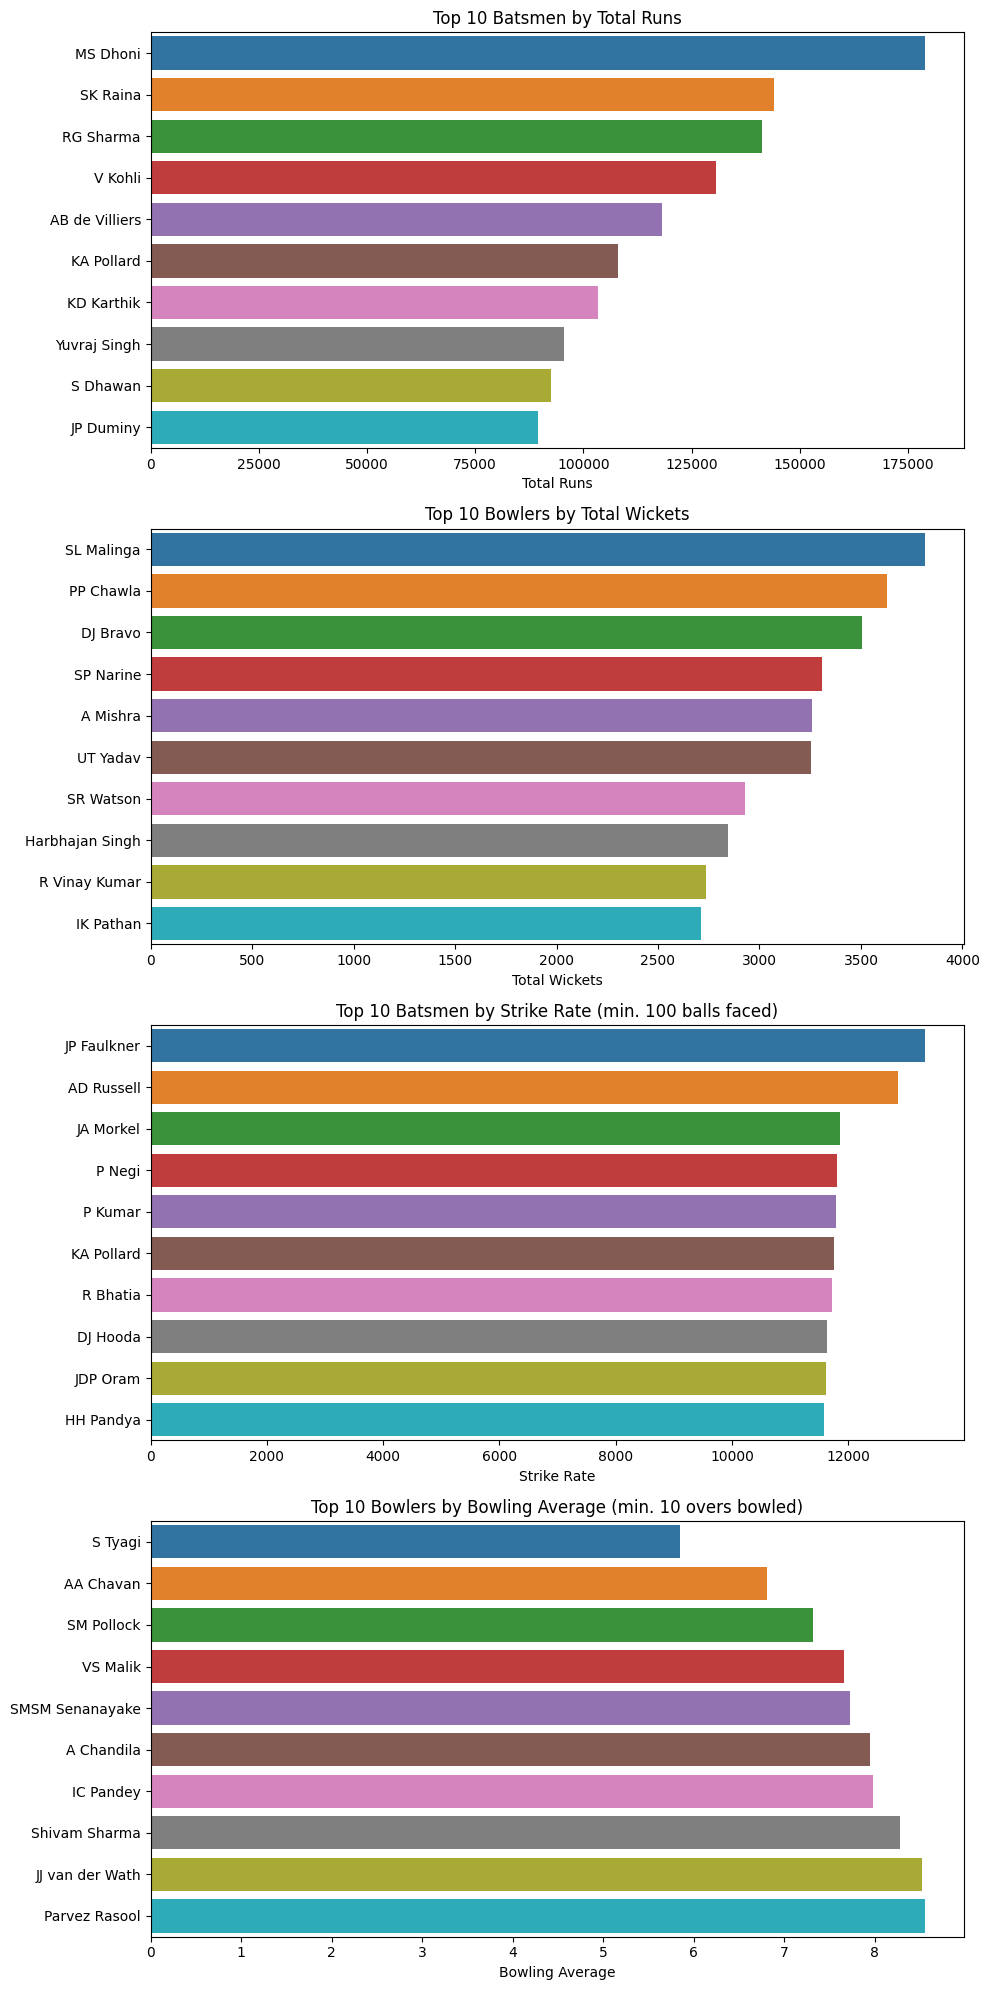

In [7]:
# Fill NaN values with 0
player_performance.fillna(0, inplace=True)

# Set up the matplotlib figure
f, axes = plt.subplots(4, 1, figsize=(10, 20))

# Top 10 Batsmen by Total Runs
top_batsmen = player_performance['Total Runs'].nlargest(10)
sns.barplot(x=top_batsmen, y=top_batsmen.index, ax=axes[0])
axes[0].set_title('Top 10 Batsmen by Total Runs')

# Top 10 Bowlers by Total Wickets
top_bowlers = player_performance['Total Wickets'].nlargest(10)
sns.barplot(x=top_bowlers, y=top_bowlers.index, ax=axes[1])
axes[1].set_title('Top 10 Bowlers by Total Wickets')

# Top 10 Batsmen by Strike Rate
top_strike_rates = player_performance[player_performance['Total Balls Faced'] > 100]['Strike Rate'].nlargest(10)
sns.barplot(x=top_strike_rates, y=top_strike_rates.index, ax=axes[2])
axes[2].set_title('Top 10 Batsmen by Strike Rate (min. 100 balls faced)')

# Top 10 Bowlers by Bowling Average
top_bowling_averages = player_performance[player_performance['Total Overs Bowled'] > 10]['Bowling Average'].nsmallest(10)
sns.barplot(x=top_bowling_averages, y=top_bowling_averages.index, ax=axes[3])
axes[3].set_title('Top 10 Bowlers by Bowling Average (min. 10 overs bowled)')

plt.tight_layout()
plt.show()
